In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) 
of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

Input variables
- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)

Predict variable (desired target):
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
# Įsikeliame duomenis
df = pd.read_csv("portuguese_banking.csv")

In [4]:
print('Duomenys prieš dublikatų patikrinimą/išmetimą:\t', df.shape)
df = df.drop_duplicates()
print('Duomenys po dublikatų patikrinimo/išmetimo:\t', df.shape)

Duomenys prieš dublikatų patikrinimą/išmetimą:	 (41188, 21)
Duomenys po dublikatų patikrinimo/išmetimo:	 (41176, 21)


In [5]:
# Apžvelgiame duomenų tipus
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp_var_rate      41176 non-null float64
cons_price_idx    41176 non-null float64
cons_conf_idx     41176 non-null float64
euribor3m         41176 non-null float64
nr_employed       41176 non-null float64
y                 41176 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

Po dublikatų išmetimo duomenų rinkinyje turime 41176 eilučių ir 21 stulpelį:
- Mūsų pagrindinis parametras yra stulpelyje 'y', kuris pasako ar klientas pasidėjo indėlį banke
- Taip pat turime 10 kategorinių ir 10 skaitinių kintamųjų

In [6]:
# Apžvelgiame duomenų pradžią ir pabaigą
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


### Apžvelgiame kategorinius kintamuosius

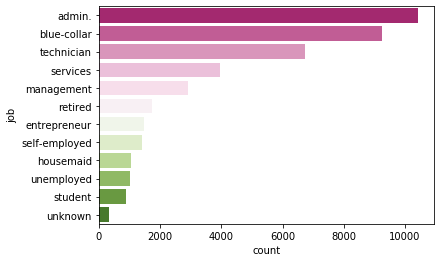

In [8]:
sns.countplot(y ='job', data=df, order = df['job'].value_counts().index, palette = 'PiYG')
plt.show()

- Matome, kad didžiąją dalį duomenų sudaro 3 pozicijų specialistai: Admin, Blue-collar, Technician
- Retired, unemployed ir student apjungsime į vieną kaip asmenis negaunačius darbinių pajamų
- Unknown duomenis pašalinsime

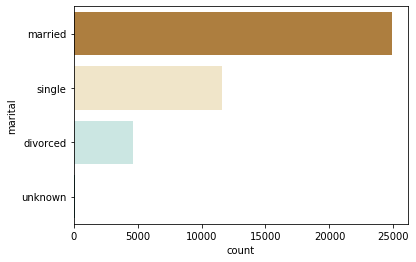

In [9]:
sns.countplot(y ='marital', data=df, order = df['marital'].value_counts().index, palette = 'BrBG')
plt.show()

- Santuokos statusą Single ir Divorced galime apjungti į vieną kintamąjį 'single'
- Taip pat matome, kad labai minimaliai yra 'unknown' duomenų, kuriuos galime pašalinti

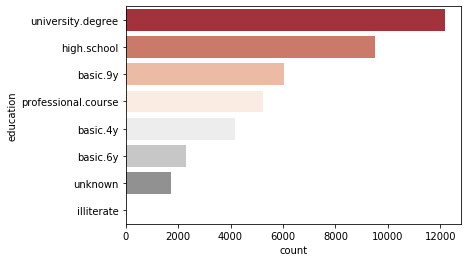

In [10]:
sns.countplot(y ='education', data=df, order = df['education'].value_counts().index, palette = 'RdGy')
plt.show()

- Išsilavinimo laipsnius taip pat galime apjungti, t.y. visus kintamuosius į turinčius universitetinį išsilavinimą ir neturinčius universitetinio išsilavinimo 
- Taip pat pašalinsime 'illiterate' duomenis.

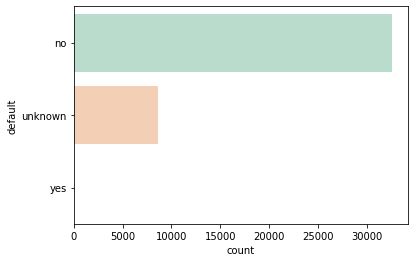

In [11]:
sns.countplot(y ='default', data=df, order = df['default'].value_counts().index, palette = 'Pastel2')
plt.show()

- Pasidarysime papildomą grafiką, kuriame atvaizduosime duomenis per mūsų pagrindinį kintamąjį 'y'. Tikėtina, kad šios kintamojo nenaudosime, nes jis mus nesukurs papildomų įžvalgų

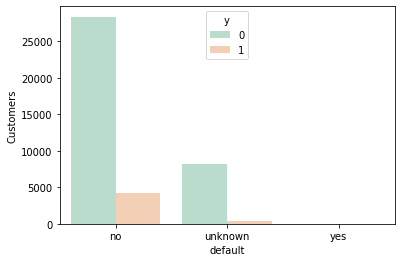

In [12]:
axis_y = 'Customers'
df_pl = df.groupby('default')['y'].value_counts()
df_pl = df_pl.to_frame().rename({'y': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='default', y= axis_y, hue='y', data=df_pl, palette='Pastel2')

- Iš "default" klientų diagramos matome, kad šis kintamasis mums neturi reikšmės, nes "default'intų" klientų bankas nepritraukė, vadinasi visos reikšmės pavertus į 1 ir 0 būtų 0.

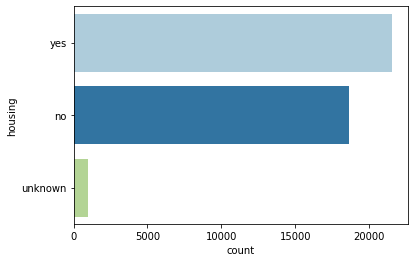

In [13]:
sns.countplot(y ='housing', data=df, order = df['housing'].value_counts().index, palette = 'Paired')
plt.show()

- Šioje diagramoje dominuoja dvi reikšmės, todėl "unknown" reiškmes galėsime pašalinti dar ir todėl, nes jų yra labai mažai.

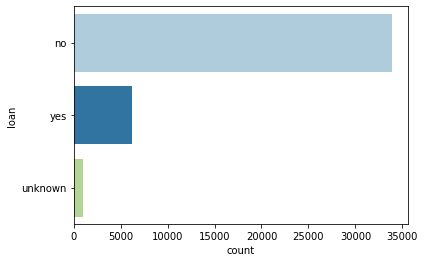

In [14]:
sns.countplot(y ='loan', data=df, order = df['loan'].value_counts().index, palette = 'Paired')
plt.show()

- Šioje diagramoje tai pat dominuoja dvi reikšmės, todėl "unknown" reiškmes galėsime pašalinti dar ir todėl, nes jų yra labai mažai.

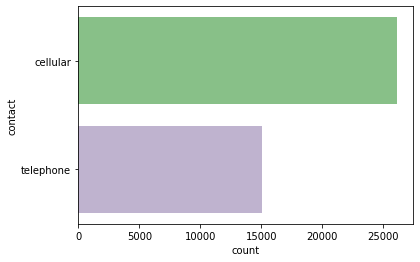

In [15]:
sns.countplot(y ='contact', data=df, order = df['contact'].value_counts().index, palette = 'Accent')
plt.show()

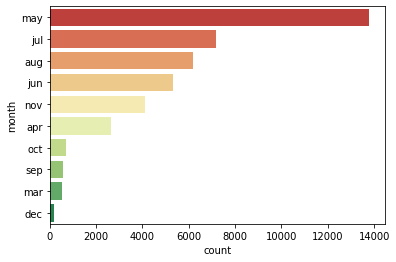

In [16]:
sns.countplot(y ='month', data=df, order = df['month'].value_counts().index, palette = 'RdYlGn')
plt.show()

Diagramoje "last contact month of year" matome, didžiąjai klientui daliai skambinta pavasarį ir vasarą.

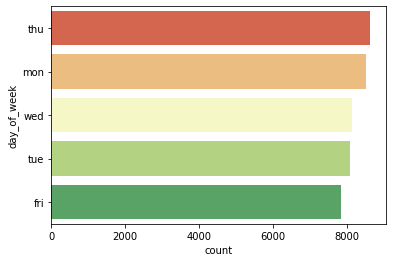

In [17]:
sns.countplot(y ='day_of_week', data=df, order = df['day_of_week'].value_counts().index, palette = 'RdYlGn')
plt.show()

Iš šios diagramos matome, kad skambučiai klientams pasiskirstę tolygiai darbo savaitėje, todėl mums šis kintamasis nebus reikšmingas ir jį galėsime pašalinti

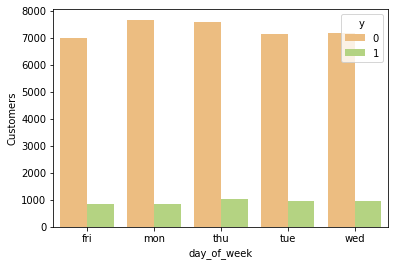

In [18]:
axis_y = 'Customers'
df_pl = df.groupby('day_of_week')['y'].value_counts()
df_pl = df_pl.to_frame().rename({'y': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='day_of_week', y= axis_y, hue='y', data=df_pl, palette='RdYlGn')

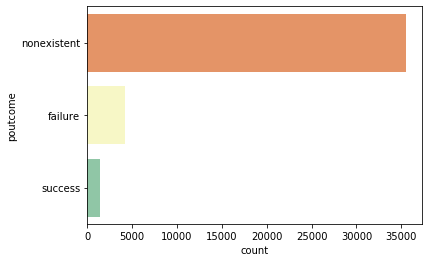

In [19]:
sns.countplot(y ='poutcome', data=df, order = df['poutcome'].value_counts().index, palette = 'Spectral')
plt.show()

Diagramoje "outcome of the previous marketing campaign" pastebime, kad dominuojanti yra tik viena reikšmė. Papildomai įsivertiname rezultatus per mūsų pagrindinį kintamąjį.

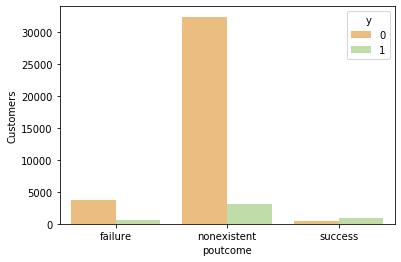

In [20]:
axis_y = 'Customers'
df_pl = df.groupby('poutcome')['y'].value_counts()
df_pl = df_pl.to_frame().rename({'y': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='poutcome', y= axis_y, hue='y', data=df_pl, palette='Spectral')

Apžvelgiame skaitinius kintamuosius

In [21]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## DATA PREPARATION

In [22]:
df_updated = df.copy()

df_updated = df_updated[df_updated.job != 'unknown']
df_updated = df_updated[df_updated.marital != 'unknown']
df_updated = df_updated[df_updated.housing != 'unknown']
df_updated = df_updated[df_updated.loan != 'unknown']
df_updated = df_updated[df_updated.education != 'illiterate']

del df_updated['default']
del df_updated['duration']

In [23]:
df_updated.job.replace(['unemployed', 'retired', 'student'], 'no_job_income', inplace=True)
df_updated.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
df_updated.marital.replace(['single', 'divorced'], 'single', inplace=True)
df_updated.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'other', inplace=True)
df_updated.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'other', inplace=True)
df_updated.poutcome.replace(['nonexistent', 'failure'], 'nonexistent', inplace=True)

df_updated.shape

(39773, 19)

In [24]:
df_updated.marital.replace('yes', 1, inplace=True)
df_updated.marital.replace('no', 0, inplace=True)

df_updated.housing.replace('yes', 1, inplace=True)
df_updated.housing.replace('no', 0, inplace=True)

df_updated.loan.replace('yes', 1, inplace=True)
df_updated.loan.replace('no', 0, inplace=True)

df_updated.poutcome.replace('succsess', 1, inplace=True)
df_updated.poutcome.replace('nonexistent', 0, inplace=True)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


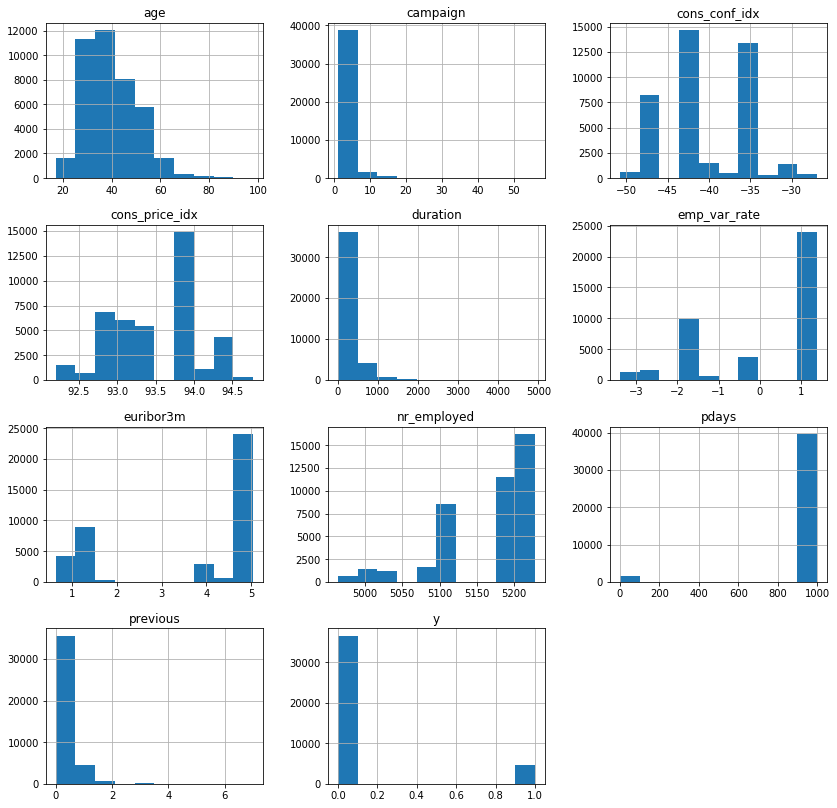

In [25]:
df.hist(figsize=(14,14))
plt.show()

## Pagridinis kintamasis

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

Subscribed client: Yes	 -  4482 ( 11.27 %)
Subscribed client: No	 - 35291 ( 88.73 %)


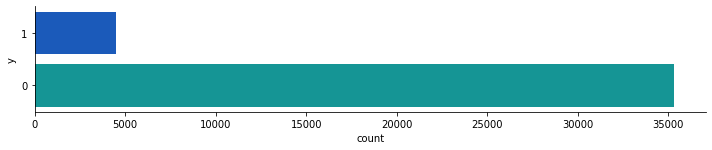

In [26]:
ax = sns.catplot(y='y', kind='count', data=df_updated, height=2, aspect=5, orient='h',palette='winter',
                 order=[1,0])
No, Yes= df_updated.y.value_counts()
print('Subscribed client: Yes\t - ', Yes,  '(',round(Yes/len(df_updated.y)*100,2), '%)')
print('Subscribed client: No\t -', No,  '(',round(No/len(df_updated.y)*100,2), '%)')

y = df_updated.y

## Tikriname kolinerumą

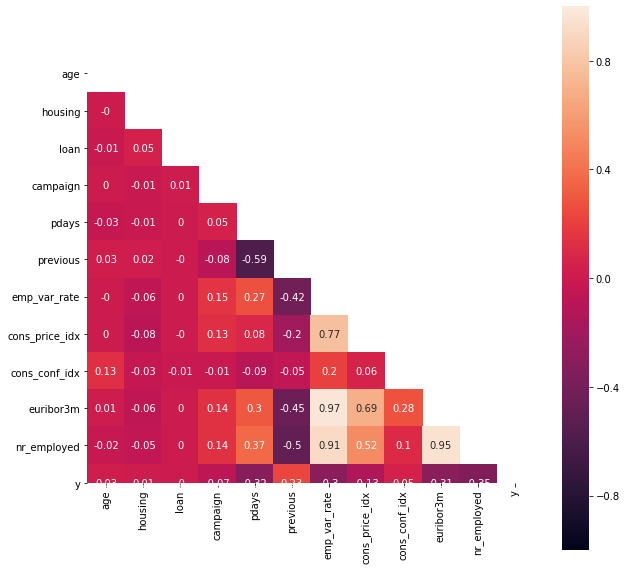

In [27]:
corr=df_updated.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, square=True)

In [28]:
df_updated.corr()

,age,housing,loan,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.001674,-0.006808,0.003360,-0.034652,0.025139,-0.001093,0.000153,0.128055,0.009999,-0.018206,0.030093
housing,-0.001674,1.000000,0.046196,-0.010396,-0.011195,0.021579,-0.060764,-0.080876,-0.033988,-0.059756,-0.046561,0.011615
loan,-0.006808,0.046196,1.000000,0.005092,0.000011,-0.002226,0.002132,-0.004231,-0.013199,0.000289,0.004545,-0.004263
campaign,0.003360,-0.010396,0.005092,1.000000,0.052167,-0.079343,0.151019,0.128142,-0.013799,0.135438,0.144364,-0.065768
pdays,-0.034652,-0.011195,0.000011,0.052167,1.000000,-0.585730,0.270377,0.079287,-0.092972,0.295621,0.370807,-0.324905
previous,0.025139,0.021579,-0.002226,-0.079343,-0.585730,1.000000,-0.419387,-0.203315,-0.051463,-0.452804,-0.498838,0.227580
emp_var_rate,-0.001093,-0.060764,0.002132,0.151019,0.270377,-0.419387,1.000000,0.774918,0.199423,0.972234,0.906962,-0.296852
cons_price_idx,0.000153,-0.080876,-0.004231,0.128142,0.079287,-0.203315,0.774918,1.000000,0.062130,0.687577,0.521034,-0.134931
cons_conf_idx,0.128055,-0.033988,-0.013199,-0.013799,-0.092972,-0.051463,0.199423,0.062130,1.000000,0.280512,0.103403,0.054417
euribor3m,0.009999,-0.059756,0.000289,0.135438,0.295621,-0.452804,0.972234,0.687577,0.280512,1.000000,0.945209,-0.305924


In [161]:
df_updated_dummies = pd.get_dummies(df_updated, drop_first=True)
df_updated=df_updated_dummies

## Test-train split

In [174]:
X=df_updated.drop(['y'], axis=1)
y=df_updated.y
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=1)

In [175]:
for var in [X_train, X_test, y_train, y_test]:
    print (var.shape)

(31818, 38)
(7955, 38)
(31818,)
(7955,)


## Predictions

In [176]:
lg=LogisticRegression()

lg.fit(X_train, y_train)
predictions=lg.predict(X_test)

C:\Users\Tadas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [177]:
conf=metrics.confusion_matrix(y_test, predictions)
conf

array([[6941,  115],
       [ 691,  208]], dtype=int64)

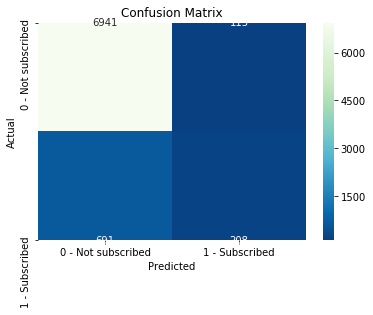

In [178]:
fig, ax = plt.subplots()
ax= plt.subplot()
sns.heatmap(conf,annot=True, ax = ax, cmap='GnBu_r', fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0 - Not subscribed', '1 - Subscribed'])
ax.yaxis.set_ticklabels(['0 - Not subscribed', '1 - Subscribed']);

In [179]:
print('Precision:\t\t', metrics.precision_score(y_test, predictions))
print('Recall:\t\t\t', metrics.recall_score(y_test, predictions))
print('Accuracy:\t\t', metrics.accuracy_score(y_test, predictions))

Precision:		 0.6439628482972136
Recall:			 0.23136818687430477
Accuracy:		 0.8986800754242614


# Išvados

- Dabartinėje stadijoje modelio tikslumas yra prastas ir modelis turėtų būti tobulinamas.
- Modelis iš visos imties parenka tik 23 procentus (Recall) aktualių reikšmių, iš kurių yra 64 procentų (Precision) tikimybė, kad klientas taps banko klientu pasidėdamas jame indelį
- Kad pasiektume geresnių rezultatų, reikėtų detaliau panagrinėti kiekvieną kategorinį ir skaitinį kintamąjį bei geriaus juos atrinkti modeliui.
- Darau prielaidą, kad duomenų rinkinys taip pat yra nesubalansuotas, nes turi tik 11 procentų teigiamų reikšmių, o 89 procentai yra neigiamos reikšmės, todėl reikėtų šį santykį pagerinti teisingiau apdorjant kintamuosius.